In [7]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [49]:
topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_cutted_really_masked_chunk22.fits'
fn_obiwan = 'obiwan_200per_0125_really_masked_chunk22.fits'
DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)

In [9]:
obiwan.columns

ColDefs(
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'flux_z'; format = 'E'
    name = 'mw_transmission_z'; format = 'E'
    name = 'z'; format = 'D'
    name = 'flux_g'; format = 'E'
    name = 'mw_transmission_g'; format = 'E'
    name = 'g'; format = 'D'
    name = 'flux_r'; format = 'E'
    name = 'mw_transmission_r'; format = 'E'
    name = 'r'; format = 'D'
    name = 'nn_redshift'; format = 'D'
    name = 'brickname'; format = '8A'
    name = 'angdis'; format = 'D'
    name = 'VETOMASK'; format = 'B'
    name = 'MCHUNK'; format = 'B'
)

[ 3.82231534  0.10710342  0.09110922]


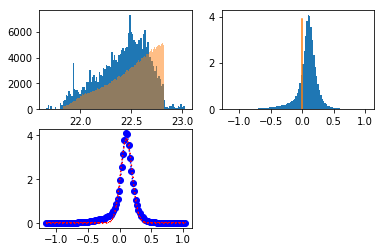

In [78]:
plt.subplot(2,2,1)
z_mag_hist1 = plt.hist(obiwan['g'],bins = 100)
z_mag2 = 22.5 - 2.5 * np.log10(obiwan['flux_g'] / obiwan['mw_transmission_g'])
z_mag_hist2 = plt.hist(z_mag2, bins=100,alpha=0.5)
plt.subplot(2,2,2)
n,bins,patches = plt.hist(z_mag2-obiwan['g'],bins=100,normed = True)
x = np.zeros(40)
y = np.arange(0,4,0.1)
plt.plot(x,y)
plt.subplot(2,2,3)
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
bin_centers = bins[:-1]+(bins[1]-bins[0])/2.0
bin_borders = bins
bin_heights = n

x = ar(bin_centers)
y = ar(bin_heights)

n = len(x)                          #the number of data
mean = 0.25                #note this correction
sigma = 0.5       #note this correction

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])

plt.plot(x,y,'bo:',label='data')
plt.plot(x,gaus(x,*popt),'r,:',label='fit')
print(popt)
#z band difference is: 0.08528844 +/- 0.08669324 (get +/- 1 sigma, <-0.0014048000000000116 or >0.17198168)

In [74]:
def mag_dist(mag,data):
    mag_input = data[mag]
    g     = 22.5 - 2.5 * np.log10(data['flux_g'] / data['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * np.log10(data['flux_r'] / data['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * np.log10(data['flux_z'] / data['mw_transmission_z'])
    if mag == 'g':
        mag_output = g
    if mag == 'r':
        mag_output = r_mag
    if mag == 'z':
        mag_output = z_mag
    mag_diff = mag_output-mag_input
    sup = mag_diff.mean() + mag_diff.std()
    inf = mag_diff.mean() - mag_diff.std()
    sel = (mag_diff<sup)&(mag_diff>inf)
    dat_sel = data[sel==False]
    plt.hexbin(dat_sel['ra'],dat_sel['dec'],gridsize = 50)

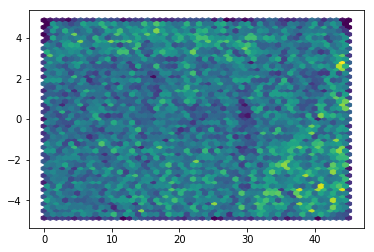

In [75]:
mag_dist('z',obiwan)

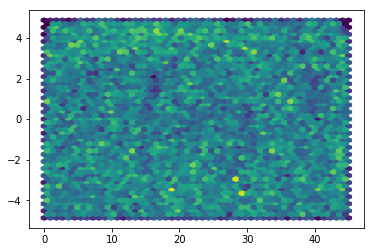

In [76]:
mag_dist('g',obiwan)

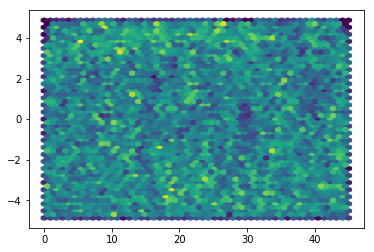

In [77]:
mag_dist('r',obiwan)

Text(0.5,1,'r-z')

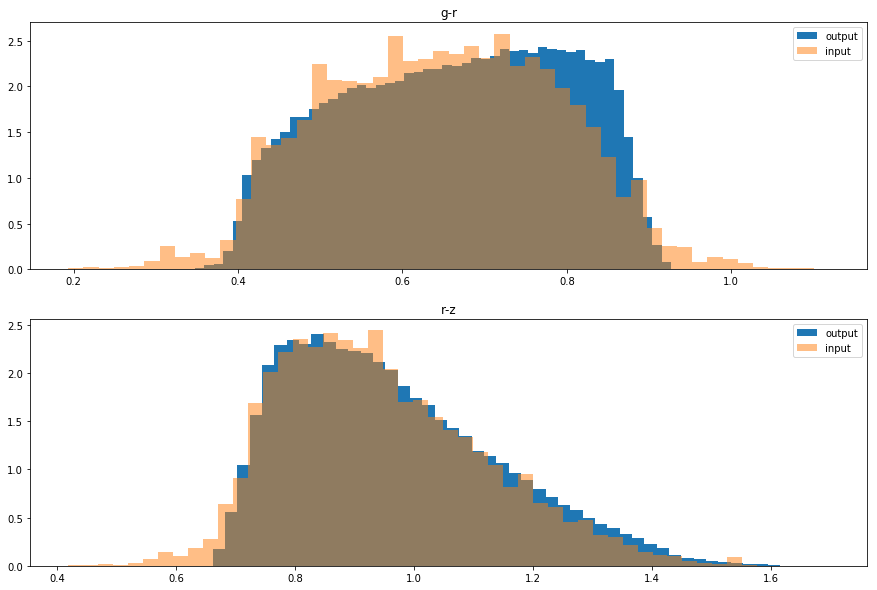

In [37]:
def mag(data,mag):
    mag_input = data[mag]
    g     = 22.5 - 2.5 * np.log10(data['flux_g'] / data['mw_transmission_g'])
    r_mag = 22.5 - 2.5 * np.log10(data['flux_r'] / data['mw_transmission_r'])
    z_mag = 22.5 - 2.5 * np.log10(data['flux_z'] / data['mw_transmission_z'])
    if mag == 'g':
        return g
    if mag == 'r':
        return r_mag
    if mag == 'z':
        return z_mag
#g-r hist input,output (to ELG cut)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(mag(obiwan,'g')-mag(obiwan,'r'),label = 'output', bins = 50,stacked = False, normed = True)
plt.legend()
plt.hist(obiwan['g'] - obiwan['r'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('g-r')
#r-z hist input,output (to ELG cut)
plt.subplot(2,1,2)
plt.hist(mag(obiwan,'r')-mag(obiwan,'z'),label = 'output', bins = 50,stacked = False, normed = True)
plt.legend()
plt.hist(obiwan['r'] - obiwan['z'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('r-z')

Text(0.5,1,'z')

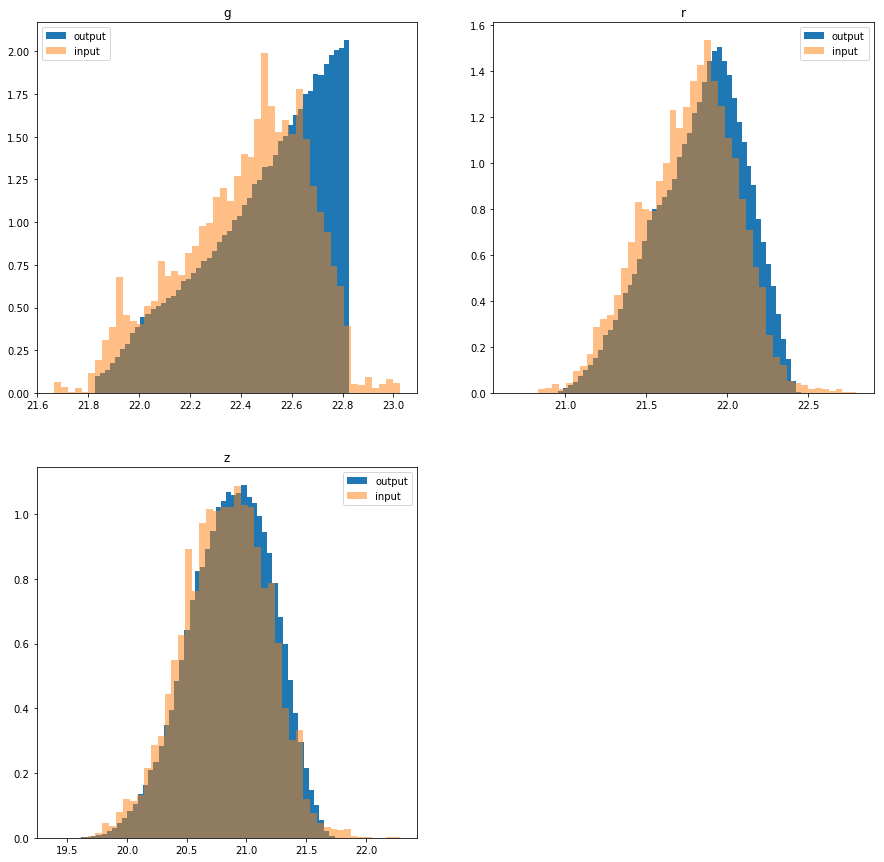

In [36]:
#g,r,z hist input,output (to ELG cut)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(mag(obiwan,'g'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['g'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('g')

plt.subplot(2,2,2)
plt.hist(mag(obiwan,'r'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['r'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('r')

plt.subplot(2,2,3)
plt.hist(mag(obiwan,'z'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['z'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('z')

Text(0.5,1,'data')

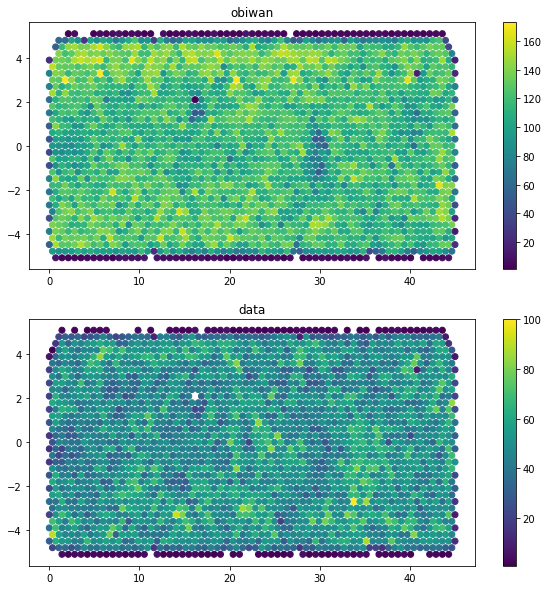

In [54]:
#output density
import healpy as hp
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3]).data
sel = dat['num']
sel_num = sel>0
final = dat[sel_num]
sc = plt.scatter(final['ra'],final['dec'],c=final['num'])
plt.colorbar(sc)
plt.title('obiwan')

plt.subplot(2,1,2)
pixs = hp.ang2pix(128,DAT['ra'],DAT['dec'],nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3]).data
sel = dat['num']
sel_num = sel>0
final = dat[sel_num]
sc2 = plt.scatter(final['ra'],final['dec'],c=final['num'])
plt.colorbar(sc2)
plt.title('data')

Text(0.5,1,'obiwan 0<z<0.6')

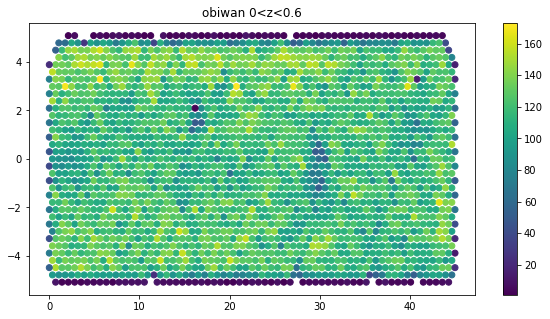

In [57]:
#output denisty 0.6<z<1.1
plt.figure(figsize=(10,5))
redshift = obiwan['nn_redshift']
obiwan_sel = (redshift<1.1)&(redshift>0.6)
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3]).data
sel = dat['num']
sel_num = sel>0
final = dat[sel_num]
sc = plt.scatter(final['ra'],final['dec'],c=final['num'])
plt.colorbar(sc)
plt.title('obiwan 0<z<0.6')

In [62]:
#mean <mag-mag_true> plot g,r,z
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
N = 12*128**2
hist_n = np.zeros(N)
hist_mag_diff_g = np.zeros(N)
hist_mag_diff_r = np.zeros(N)
hist_mag_diff_z = np.zeros(N)
mag_g = mag(obiwan,'g')
mag_r =  mag(obiwan,'r')
mag_z = mag(obiwan,'z')
for i in range(len(pixs)):
    n = pixs[i]
    mag_diff_g = mag_g[i] - obiwan['g'][i]
    mag_diff_r = mag_r[i] - obiwan['r'][i]
    mag_diff_z = mag_z[i] - obiwan['z'][i]
    hist_mag_diff_g[n]+=mag_diff_g
    hist_mag_diff_r[n]+=mag_diff_r
    hist_mag_diff_z[n]+=mag_diff_z
    hist_n[n]+=1

Text(0.5,1,'g mag diff hist')

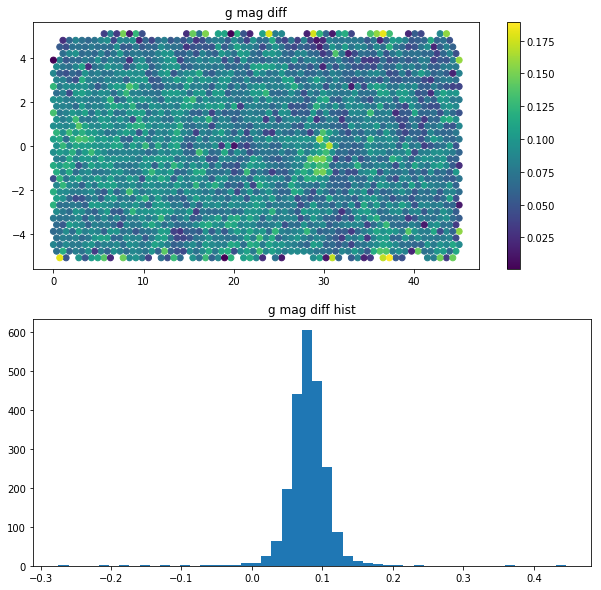

In [79]:
ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist_n, format = 'D')
col4 = fits.Column(name = 'hist_mag_diff_g', array = hist_mag_diff_g, format = 'D')
col5 = fits.Column(name = 'hist_mag_diff_r', array = hist_mag_diff_r, format = 'D')
col6 = fits.Column(name = 'hist_mag_diff_z', array = hist_mag_diff_z, format = 'D')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6]).data
sel = dat['num']
sel_num = (sel>0)
final = dat[sel_num]
hist_mag_diff_g_sel = final['hist_mag_diff_g']/final['num']
sel = (hist_mag_diff_g_sel>0.0)&(hist_mag_diff_g_sel<0.19)
super_final = final[sel]
sc = plt.scatter(super_final['ra'],super_final['dec'],c=super_final['hist_mag_diff_g']/super_final['num'])
plt.colorbar(sc)
plt.title('g mag diff')
plt.subplot(2,1,2)
pt = plt.hist(final['hist_mag_diff_g']/final['num'],bins = 50)
plt.title('g mag diff hist')

Text(0.5,1,'r mag diff hist mean:0.063344')

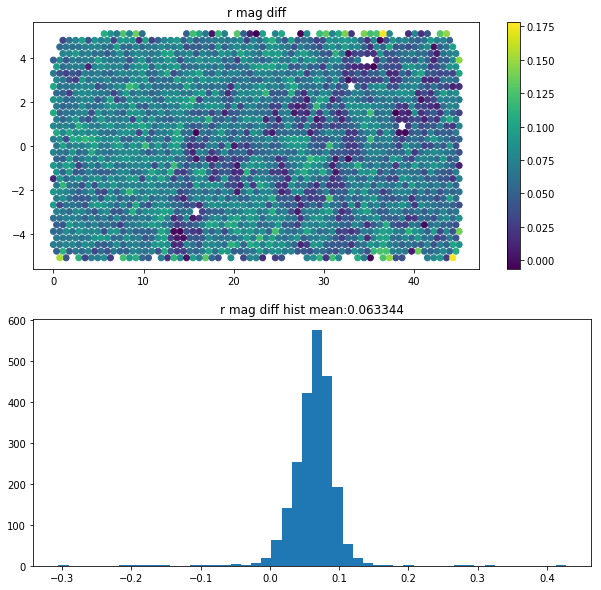

In [83]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6]).data
sel = dat['num']
sel_num = (sel>0)
final = dat[sel_num]
hist_mag_diff_r_sel = final['hist_mag_diff_r']/final['num']
sel = (hist_mag_diff_r_sel>-0.01)&(hist_mag_diff_r_sel<0.18)
super_final = final[sel]
sc = plt.scatter(super_final['ra'],super_final['dec'],c=super_final['hist_mag_diff_r']/super_final['num'])
plt.colorbar(sc)
plt.title('r mag diff')
plt.subplot(2,1,2)
pt = plt.hist(final['hist_mag_diff_r']/final['num'],bins = 50)
plt.title('r mag diff hist mean:%f' % (final['hist_mag_diff_r']/final['num']).mean())

Text(0.5,1,'z mag diff hist mean:0.044256')

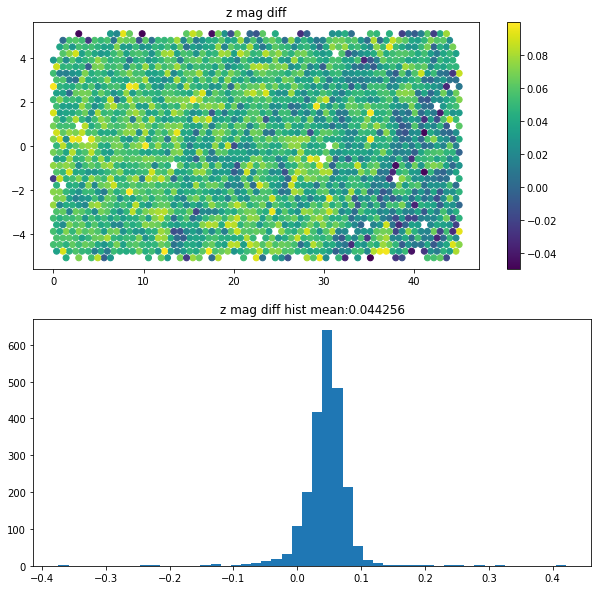

In [86]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6]).data
sel = dat['num']
sel_num = (sel>0)
final = dat[sel_num]
hist_mag_diff_z_sel = final['hist_mag_diff_z']/final['num']
sel = (hist_mag_diff_z_sel>-0.05)&(hist_mag_diff_z_sel<0.1)
super_final = final[sel]
sc = plt.scatter(super_final['ra'],super_final['dec'],c=super_final['hist_mag_diff_z']/super_final['num'])
plt.colorbar(sc)
plt.title('z mag diff')
plt.subplot(2,1,2)
pt = plt.hist(final['hist_mag_diff_z']/final['num'],bins = 50)
plt.title('z mag diff hist mean:%f' % (final['hist_mag_diff_z']/final['num']).mean())

In [5]:
#%input_good out


In [88]:
#%input_bad in
g = obiwan['g']
r_mag = obiwan['r']
z_mag = obiwan['z']
gr = g-r_mag
rz = r_mag - z_mag
color_sgc = (g>21.825)&(g<22.825)&(-0.068*rz+0.457<gr)&(gr< 0.112*rz+0.773) &(0.218*gr+0.571<rz)&(rz<-0.555*gr+1.901)
gL = 62.79716079
rL = 30.05661087
zL_sgc = 12.75
dat_bad = obiwan[color_sgc==False]
len(dat_bad)

22840

Text(0.5,1,'bad input ratio')

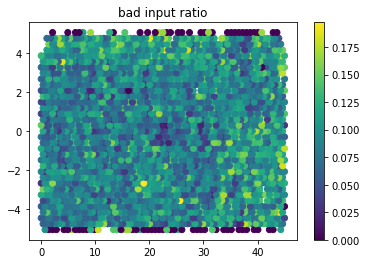

In [98]:
pixs = hp.ang2pix(128,dat_bad['ra'],dat_bad['dec'],nest = True, lonlat = True)
N = 12*128**2
hist = np.zeros(N)
for i in range(len(pixs)):
    n = pixs[i]
    hist[n]+=1
    
hist_all = np.zeros(N)
pixs2 = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
for i in range(len(pixs2)):
    n = pixs2[i]
    hist_all[n]+=1

ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num_bad', array = hist, format = 'D')
col4 = fits.Column(name = 'num_all', array = hist_all, format = 'D')
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4]).data
sel = dat['num_all']
sel_num = sel>0
final = dat[sel_num]
n_ratio = final['num_bad']/final['num_all']
sel_ratio = (n_ratio<0.2)
super_final = final[sel_ratio]
sc2 = plt.scatter(super_final['ra'],super_final['dec'],c=super_final['num_bad']/super_final['num_all'])
plt.colorbar(sc2)
plt.title('bad input ratio')

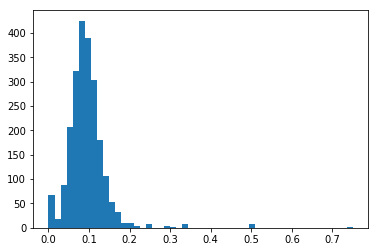

In [95]:
pt = plt.hist(final['num_bad']/final['num_all'],bins=50)